In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [22]:
df = pd.read_csv("/content/drive/MyDrive/decision tree.zip")

In [23]:
def grade_class(marks):
    if marks >= 80:
        return "A"
    elif marks >= 60:
        return "B"
    else:
        return "C"

df["Grade"] = df["Std_Marks"].apply(grade_class)

In [24]:
label = LabelEncoder()

df["Std_Branch"] = label.fit_transform(df["Std_Branch"])
df["Std_Course"] = label.fit_transform(df["Std_Course"])
df["Std_Name"] = label.fit_transform(df["Std_Name"])
df["Std_RollNo"] = label.fit_transform(df["Std_RollNo"])
df["Grade"] = label.fit_transform(df["Grade"])

In [25]:
X = df[["Std_Branch", "Std_Course", "Std_Marks"]]
y = df["Grade"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [28]:
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



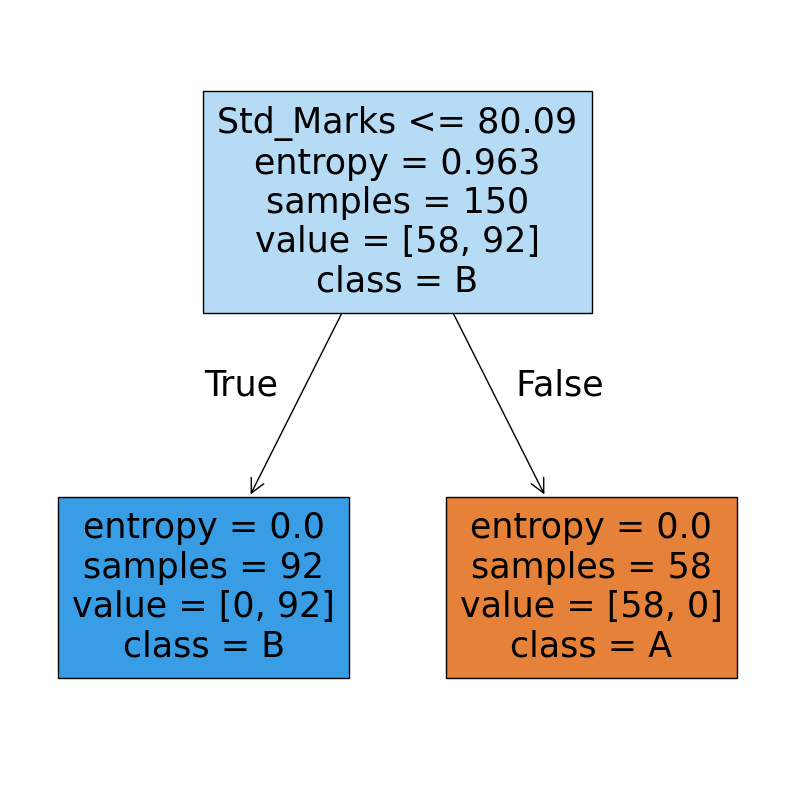

In [29]:
plt.figure(figsize=(10, 10))
tree.plot_tree(dt, feature_names=X.columns, class_names=["A", "B", "C"], filled=True)
plt.show()